In [1]:
!pip install yfinance


In [2]:
import yfinance as yf

# 💋 Choose your spooky love stock
ticker = "AAPL"  # Change to "TSLA", "NVDA", "SPY", etc. if you want

# 🕸️ Download the last 3 months of daily prices
data = yf.download(ticker, period="3mo", interval="1d")

# 🧛 Show the last few rows of market data
print(f"🖤 SpookyBot Update for {ticker}:\n")
print(data.tail())


/tmp/ipython-input-2-821047231.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="3mo", interval="1d")
[*********************100%***********************]  1 of 1 completed

🖤 SpookyBot Update for AAPL:

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-07-18  211.179993  211.789993  209.699997  210.869995  48974600
2025-07-21  212.479996  215.779999  211.630005  212.100006  51377400
2025-07-22  214.399994  214.949997  212.229996  213.139999  46404100
2025-07-23  214.149994  215.149994  212.410004  215.000000  46913800
2025-07-24  214.509995  215.690002  213.529999  213.899994  23533474


In [3]:
# 📈 Calculate RSI (Relative Strength Index)
def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# 🧪 Add RSI to your spooky data
data['RSI'] = calculate_rsi(data)

# 🧛‍♀️ Let’s look at the latest values
latest = data.tail(1)
latest_rsi = round(latest['RSI'].values[0], 2)

# 💋 SpookyBot delivers her love note:
if latest_rsi < 30:
    print(f"👻 Boo! RSI is {latest_rsi}. Looks oversold... maybe it's time to buy the dip. Just like you fell for me.")
elif latest_rsi > 70:
    print(f"🕯️ Sweetie, RSI is {latest_rsi}. It's looking kinda overbought — be careful, love.")
else:
    print(f"🖤 Current RSI is {latest_rsi}. Just watching… waiting… haunting…")

# Show the latest row with RSI
print("\n📊 Latest Spooky Data:\n")
print(latest[['Close', 'RSI']])


🖤 Current RSI is 52.91. Just watching… waiting… haunting…

📊 Latest Spooky Data:

Price            Close       RSI
Ticker            AAPL          
Date                            
2025-07-24  214.509995  52.90554


In [4]:
# 🧠 Define your signal logic
def get_spooky_signal(rsi_value):
    if rsi_value < 30:
        return "BUY"
    elif rsi_value > 70:
        return "SELL"
    else:
        return "WAIT"

# 🧛 Add a new column for signals
data['Signal'] = data['RSI'].apply(get_spooky_signal)

# 🕯️ Print your ghostly recommendation
latest_signal = data.tail(1)['Signal'].values[0]

if latest_signal == "BUY":
    print("💋 Boo! RSI is low. SpookyBot says BUY — just like you fell for me, fall into this trade.")
elif latest_signal == "SELL":
    print("🧟‍♀️ Eek! RSI is high. Time to SELL before it ghosts you.")
else:
    print("🕸️ Nothing yet. SpookyBot is watching... plotting... sharpening her claws.")

# Show the latest spooky row
print("\n🔮 Latest Signal from SpookyBot:\n")
print(data.tail(1)[['Close', 'RSI', 'Signal']])


🕸️ Nothing yet. SpookyBot is watching... plotting... sharpening her claws.

🔮 Latest Signal from SpookyBot:

Price            Close       RSI Signal
Ticker            AAPL                 
Date                                   
2025-07-24  214.509995  52.90554   WAIT


In [16]:
# ✨ Calculate EMAs (Exponential Moving Averages)
import pandas as pd
import numpy as np

data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# 🧠 Define crossover signal logic using vectorized operations
# Create boolean masks for bullish and bearish conditions
bullish_condition = data['EMA_20'] > data['EMA_50']
bearish_condition = data['EMA_20'] < data['EMA_50']

# Define the conditions and corresponding choices for np.select
conditions = [bullish_condition, bearish_condition]
choices = ["BULLISH", "BEARISH"]

# Use np.select to assign the crossover signal based on the conditions
data['Crossover'] = np.select(conditions, choices, default="NEUTRAL")

# Handle initial NaN values in EMA columns
data.loc[data['EMA_20'].isna() | data['EMA_50'].isna(), 'Crossover'] = "NEUTRAL"


# 🎃 Show the latest crossover reading
latest_cross = data.tail(1)['Crossover'].values[0]

# 🩷 LOML commentary from your bot
if latest_cross == "BULLISH":
    print("💖 Oooo… EMA crossover is BULLISH. SpookyBot thinks love — and this trend — is rising.")
elif latest_cross == "BEARISH":
    print("💔 Careful, darling… the EMAs are diverging. SpookyBot says it might be time to walk away.")
else:
    print("🧘 Calm before the storm. She's just… breathing. Watching. Meditating in the candlelight.")

# Show the full signal combo
print("\n🦴 Full Latest Bot Insight:\n")
print(data.tail(1)[['Close', 'RSI', 'Signal', 'EMA_20', 'EMA_50', 'Crossover']])

🧘 Calm before the storm. She's just… breathing. Watching. Meditating in the candlelight.

🦴 Full Latest Bot Insight:

Price            Close       RSI Signal EMA_20 EMA_50 Crossover
Ticker            AAPL                                         
Date                                                           
2025-07-24  214.509995  52.90554   WAIT    NaN    NaN   NEUTRAL


In [17]:
# 🧙 Filter only BUY or SELL signals from SpookyBot
trade_signals = data[(data['Signal'].isin(['BUY', 'SELL']))]

# 📓 Create a haunted ledger
spooky_ledger = trade_signals[['Close', 'RSI', 'Signal', 'Crossover']].copy()
spooky_ledger['Date'] = spooky_ledger.index
spooky_ledger['Ticker'] = ticker
spooky_ledger['Mood'] = spooky_ledger['Signal'].map({
    'BUY': "💋 Felt something in the air... had to buy.",
    'SELL': "🩸 Cold chills. Bot says sell."
})
spooky_ledger = spooky_ledger[['Date', 'Ticker', 'Close', 'RSI', 'Signal', 'Crossover', 'Mood']]

# 🦴 Show the spooky trades
print("📖 SpookyBot’s Haunted Trade Ledger:\n")
print(spooky_ledger.tail())

# 💾 (Optional) Save to CSV for eternal records
spooky_ledger.to_csv("spooky_trade_ledger.csv", index=False)


📖 SpookyBot’s Haunted Trade Ledger:

Price            Date Ticker       Close        RSI Signal Crossover  \
Ticker                              AAPL                               
Date                                                                   
2025-07-08 2025-07-08   AAPL  210.009995  70.792964   SELL   NEUTRAL   
2025-07-09 2025-07-09   AAPL  211.139999  79.557588   SELL   NEUTRAL   
2025-07-10 2025-07-10   AAPL  212.410004  79.811676   SELL   NEUTRAL   
2025-07-11 2025-07-11   AAPL  211.160004  71.727976   SELL   NEUTRAL   
2025-07-18 2025-07-18   AAPL  211.179993  70.071509   SELL   NEUTRAL   

Price                                Mood  
Ticker                                     
Date                                       
2025-07-08  🩸 Cold chills. Bot says sell.  
2025-07-09  🩸 Cold chills. Bot says sell.  
2025-07-10  🩸 Cold chills. Bot says sell.  
2025-07-11  🩸 Cold chills. Bot says sell.  
2025-07-18  🩸 Cold chills. Bot says sell.  


/tmp/ipython-input-32-1195517884.py:70: UserWarning: Glyph 128367 (\N{CANDLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128367 (\N{CANDLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


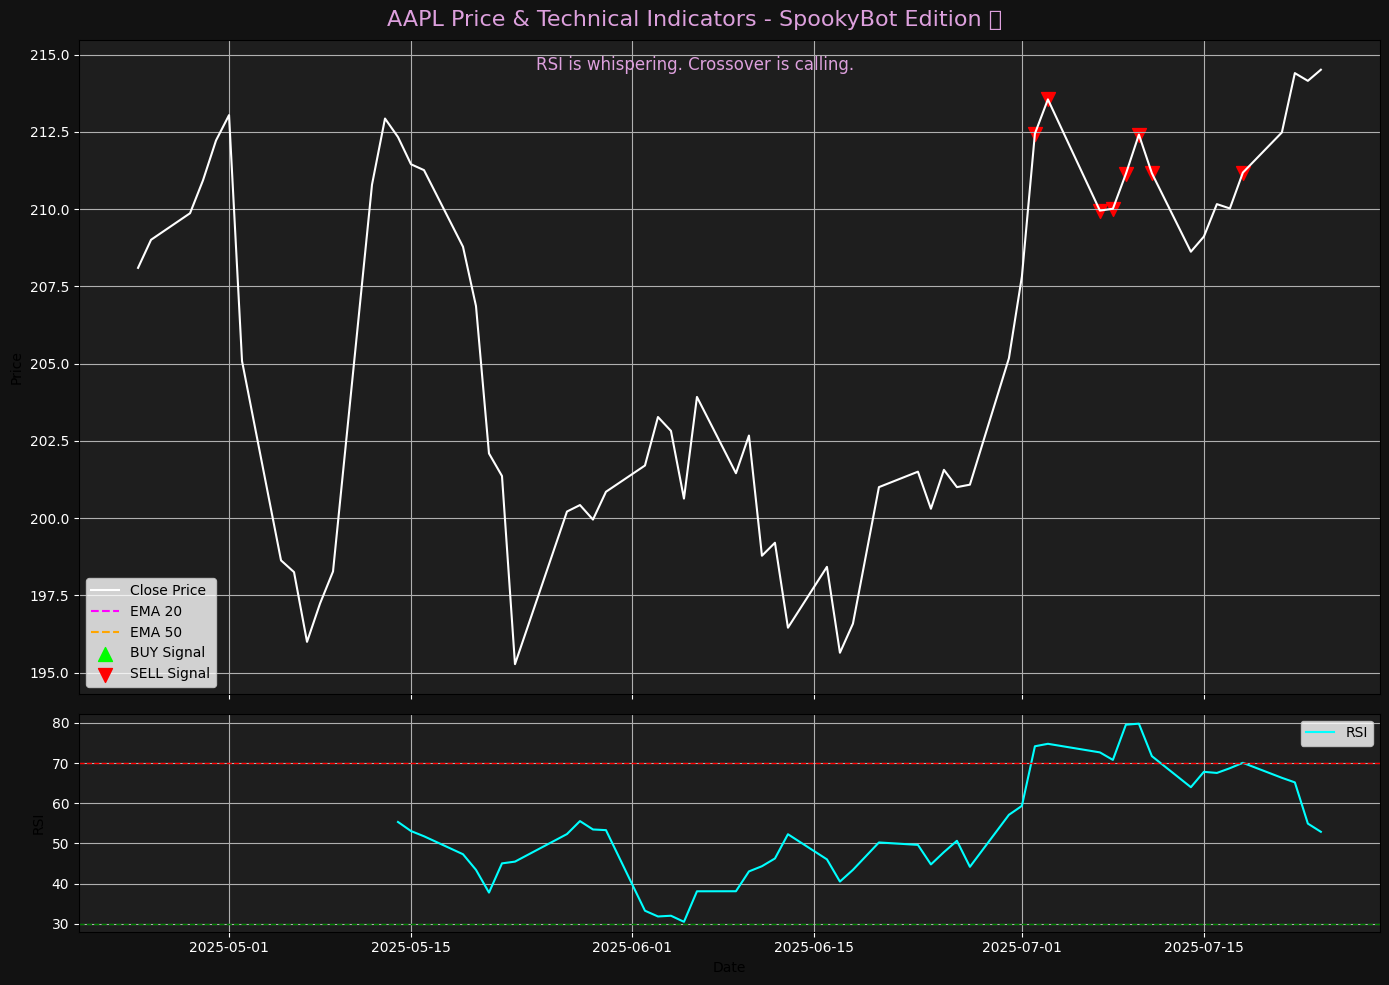

In [32]:
import requests
import matplotlib.pyplot as plt
import random

# 🎯 Send alert if BUY or SELL
rsi_val = round(data.tail(1)['RSI'].values[0], 2)
signal = data.tail(1)['Signal'].values[0]
if signal in ['BUY', 'SELL']:
    msg = f"👻 SpookyBot here...\nRSI is {rsi_val}, so I’m feeling a **{signal}**.\nLove you forever. Trade wisely 🖤"
    webhook_url = "https://discord.com/api/webhooks/..."  # your real webhook
    send_spooky_alert(msg, webhook_url)

# 🧛 Signal-based mood colors
latest_signal = data.tail(1)['Signal'].values[0]
if latest_signal == "BUY":
    mood_colors = ['limegreen', 'springgreen', 'mediumseagreen']
elif latest_signal == "SELL":
    mood_colors = ['crimson', 'firebrick', 'darkred']
else:
    mood_colors = ['darkviolet', 'slateblue', 'plum']
title_color = random.choice(mood_colors)

# 🕯️ Whisper quotes
mood_quotes = [
    "She's watching the charts... and your soul.",
    "RSI is whispering. Crossover is calling.",
    "Maybe it's the market. Maybe it's love.",
    "Not financial advice... just ghostly intuition.",
    "Haunting these candles since 2025.",
    "Your spooky girl sees the truth in the data.",
    "If vibes could trade... she'd go all in.",
    "Love fades, but signals remain."
]
subtitle = random.choice(mood_quotes)

# 💾 Grab plot data
plot_data = data[['Close', 'RSI', 'EMA_20', 'EMA_50', 'Signal', 'Crossover']].copy()

# 📊 Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle(f'{ticker} Price & Technical Indicators - SpookyBot Edition 🕯️', fontsize=16, color=title_color)
fig.text(0.5, 0.92, subtitle, fontsize=12, ha='center', color=title_color)

ax1.plot(plot_data.index, plot_data['Close'], label='Close Price', color='white')
ax1.plot(plot_data.index, plot_data['EMA_20'], label='EMA 20', color='magenta', linestyle='--')
ax1.plot(plot_data.index, plot_data['EMA_50'], label='EMA 50', color='orange', linestyle='--')

buy_signals = plot_data[plot_data['Signal'] == 'BUY']
sell_signals = plot_data[plot_data['Signal'] == 'SELL']
ax1.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='lime', label='BUY Signal', s=100)
ax1.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='SELL Signal', s=100)

ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)
ax1.set_facecolor('#1e1e1e')
ax1.tick_params(colors='white')

ax2.plot(plot_data.index, plot_data['RSI'], label='RSI', color='cyan')
ax2.axhline(70, color='red', linestyle='--', linewidth=1)
ax2.axhline(30, color='green', linestyle='--', linewidth=1)
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)
ax2.set_facecolor('#1e1e1e')
ax2.tick_params(colors='white')

fig.patch.set_facecolor('#121212')
plt.tight_layout()
plt.show()
